Imports


In [5]:
# Numpy arrays
import numpy as np
# visualization
import matplotlib.pyplot as plt
# image processing
import cv2
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
# ML
import tensorflow as tf


Loading data


In [6]:
# load dataset
mnist = tf.keras.datasets.mnist
# data already comes splitted into training and testing
# x is the input and y is the classification
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# normalize the input from 0-255 to 0-1
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)


Creating model


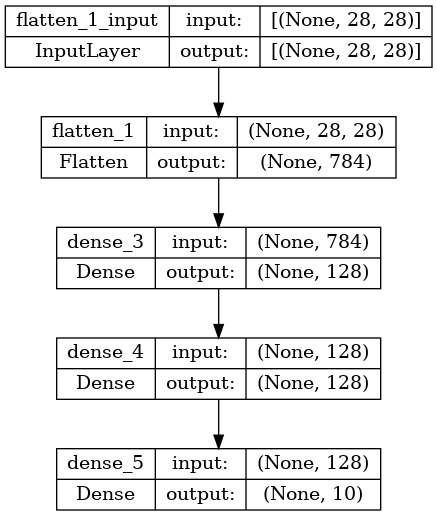

In [7]:
model = tf.keras.models.Sequential()
# Flattens the input (creates a flat layer)
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
# Creating two Dense layers with relu activation
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
# Output layer
# We use softmax as the activation to represent the confidence (0-1)
model.add(tf.keras.layers.Dense(10, activation='softmax'))
tf.keras.utils.plot_model(model, 'model.png', show_shapes=True)

Training the model

In [8]:
# We compile the model using
# The stochastic gradient descent optimization algorithm Adam
# Sparse categorical crossentropy as our loss function

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs=5)
model.save('handwritten.model')

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2632 - accuracy: 0.9234
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1113 - accuracy: 0.9656
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0765 - accuracy: 0.9762
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0554 - accuracy: 0.9828
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0419 - accuracy: 0.9862


INFO:tensorflow:Assets written to: handwritten.model/assets


INFO:tensorflow:Assets written to: handwritten.model/assets


Evaluate model

313/313 [==============================] - 1s 1ms/step - loss: 0.1212 - accuracy: 0.9730
dict_keys(['loss', 'accuracy'])


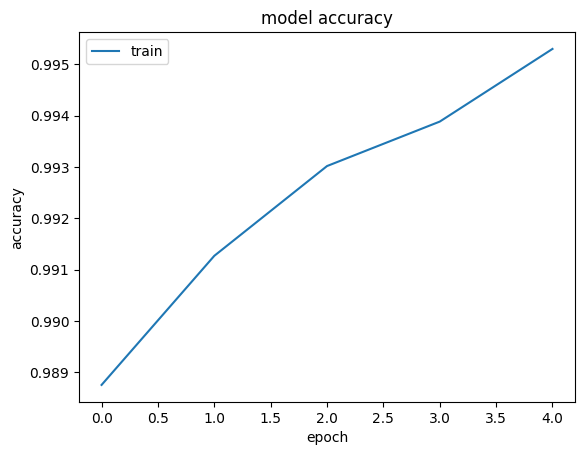

In [14]:
model = tf.keras.models.load_model('handwritten.model')
loss, accuracy = model.evaluate(x_test,y_test)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()